#Churn  Prediction Model
Zoleka Magagula

### Objective 
The objective of this project was to develop a predictive classification model capable of accurately identifying target outcomes based on historical data. This involved preprocessing the dataset, training multiple machine learning models, and evaluating their performance to determine the most effective approach for solving the classification problem.


### Goals
- Explore and analyze the dataset to identify patterns, imbalances, or potential data quality issues.
- Prepare the data for modeling through feature selection, data cleaning, and train-test splitting.
- Train and compare different classification algorithms such as Logistic Regression and Support Vector Machine (SVM).
- Use metrics like accuracy, precision, recall, F1-score, and confusion matrix to assess and compare model performance.
- Create clear and insightful visualizations including heatmaps for confusion matrices and classification reports to aid interpretation.
- Identify the model with the highest predictive performance and recommend it for deployment or further tuning.

In [0]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [0]:
# loadind the Data
df = pd.read_csv('/Volumes/databricksproject/default/customerdata/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Data Cleaning

In [0]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [0]:
# checking if the data has any null values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [0]:
# Checking if the data consists of any duplicates
df[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [0]:
# Add a 'Churn' column based on the 'Exited' column and drop unnecessary columns
df['Churn'] = df['Exited'].apply(lambda x: 'Yes' if x == 1 else 'No')
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Yes
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,No
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Yes
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,No
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,No


In [0]:
#convert gender column from categorical to numerical values 
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

#### `Feature` Selection

In [0]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Churn,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,Yes,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,No,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,Yes,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,No,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,No,0,1


In [0]:
# selecting features and target
features = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_Germany', 'Geography_Spain']
X = df[features]
y = df['Exited']

In [0]:
#splitting our data into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### `Feature` Scaling

In [0]:
# feature scaling 
scaler = StandardScaler()
X__train = scaler.fit_transform(X_train) 
X__test = scaler.transform(X_test)   

In [0]:
#display the scaled data
X__train[:5], X__test[:5]

(array([[ 0.35649971,  0.91324755, -0.6557859 ,  0.34567966, -1.21847056,
          0.80843615,  0.64920267,  0.97481699,  1.36766974, -0.57946723,
         -0.57638802],
        [-0.20389777,  0.91324755,  0.29493847, -0.3483691 ,  0.69683765,
          0.80843615,  0.64920267,  0.97481699,  1.6612541 ,  1.72572313,
         -0.57638802],
        [-0.96147213,  0.91324755, -1.41636539, -0.69539349,  0.61862909,
         -0.91668767,  0.64920267, -1.02583358, -0.25280688, -0.57946723,
          1.73494238],
        [-0.94071667, -1.09499335, -1.13114808,  1.38675281,  0.95321202,
         -0.91668767,  0.64920267, -1.02583358,  0.91539272, -0.57946723,
         -0.57638802],
        [-1.39733684,  0.91324755,  1.62595257,  1.38675281,  1.05744869,
         -0.91668767, -1.54035103, -1.02583358, -1.05960019, -0.57946723,
         -0.57638802]]),
 array([[-0.57749609,  0.91324755, -0.6557859 , -0.69539349,  0.32993735,
          0.80843615, -1.54035103, -1.02583358, -1.01960511,  1.72572

#### Random Forest Model

In [0]:
#Initialize the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

#training the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [0]:
#to make predictions 
y_pred = model.predict(X_test)

In [0]:
# Calculate the confusion matrix comparing actual and predicted labels
conf_matrix = confusion_matrix(y_test, y_pred)

# Generate a detailed classification report showing precision, recall, f1-score, and support for each class
class_report = classification_report(y_test, y_pred)

# Calculate the overall accuracy of the model's predictions
accuracy = accuracy_score(y_test, y_pred)


In [0]:
# Print the results
print(conf_matrix)
print(class_report)
print(accuracy)

[[1549   58]
 [ 208  185]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000

0.867


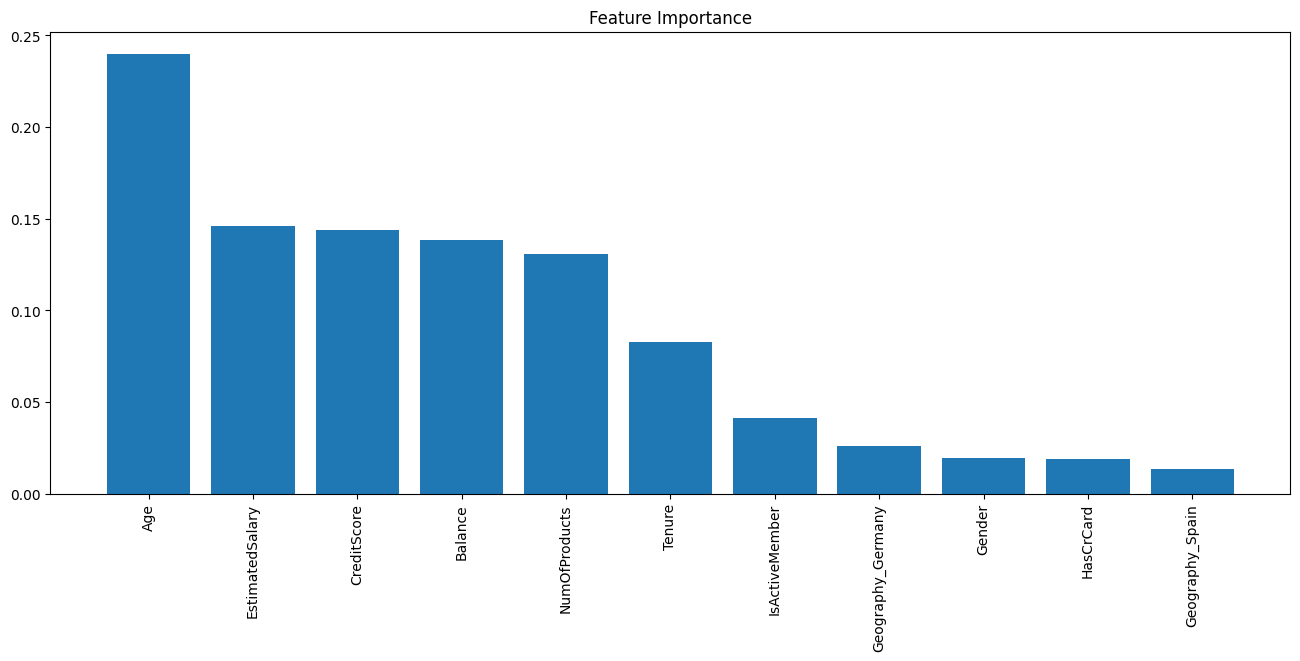

In [0]:
#visualise feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
names = [features[i] for i in indices]

plt.figure(figsize=(16, 6))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), names, rotation=90)
plt.show()

#### Logistic Regression

In [0]:
#importing logistic Regression
from sklearn.linear_model import LogisticRegression

#creating & training the model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

#predicting the model
y_pred_log_reg = log_reg.predict(X_test)

#analysing model performance
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
class_report_log_reg = classification_report(y_test, y_pred_log_reg)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

print(conf_matrix_log_reg, class_report_log_reg, accuracy_log_reg)

[[1573   34]
 [ 365   28]]               precision    recall  f1-score   support

           0       0.81      0.98      0.89      1607
           1       0.45      0.07      0.12       393

    accuracy                           0.80      2000
   macro avg       0.63      0.53      0.51      2000
weighted avg       0.74      0.80      0.74      2000
 0.8005


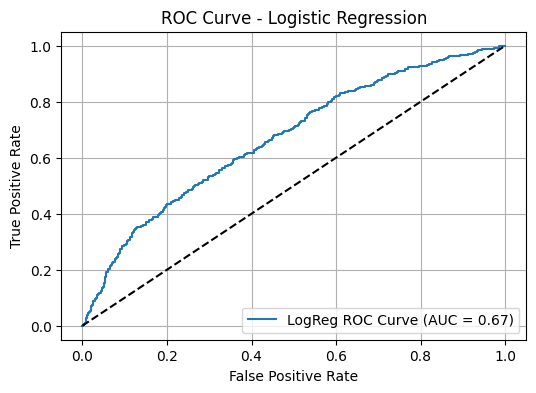

In [0]:
from sklearn.metrics import roc_curve, auc

# Get prediction probabilities for positive class
y_proba_log_reg = log_reg.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba_log_reg)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'LogReg ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

